# 6.5: Unsupervised Machine Learning: Clustering

## Table of contents:

### Task 1 - Install and import all necessary libraries in your Jupyter notebook.

### Task 2 - Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

- Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
- Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

### Task 3 - Use the elbow technique as shown in the Jupyter notebook for this Exercise.

### Task 4 - Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

- Explain why you chose that number in a markdown cell.
- If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

### Task 5 - Run the k-means algorithm.

### Task 6 - Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

### Task 7 - Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

### Task 8 - Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

- Note down your thoughts in a markdown cell.

### Task 9 - Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

### Task 10 - Propose what these results could be useful for in future steps of an analytics pipeline.

***
***

## Task 1- Install and import all necessary libraries in your Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import calendar

## Task 2 - Import your data and conduct any necessary cleaning, manipulations, and reprocessing

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\facun\Desktop\Data Analysis\CF\Data Immersion\Achievement 6\Data Sets'

In [4]:
gun_violence_df = pd.read_csv(os.path.join(path, 'Prepared', 'new_dataset.csv'), index_col = False)

### EDA

In [5]:
gun_violence_df.head()

,Unnamed: 0,incident_id,year,month,day,day_of_week,state,city_or_county,n_guns_involved,n_killed,...,victim_0-17,victim_18-30,victim_31-45,victim_46-60,victim_61+,suspect_0-17,suspect_18-30,suspect_31-45,suspect_46-60,suspect_61+
0,0,461105,2013,1,1,Tuesday,Pennsylvania,Mckeesport,NaN,0,...,0,1,0,0,0,0,0,0,0,0
1,1,460726,2013,1,1,Tuesday,California,Hawthorne,NaN,1,...,0,1,0,0,0,0,0,0,0,0
2,2,478855,2013,1,1,Tuesday,Ohio,Lorain,2.0,1,...,0,0,3,0,0,0,1,1,0,0
3,3,478925,2013,1,5,Saturday,Colorado,Aurora,NaN,4,...,0,1,1,1,0,0,0,1,0,0
4,4,478959,2013,1,7,Monday,North Carolina,Greensboro,2.0,2,...,1,1,0,1,0,0,0,0,1,0


In [6]:
gun_violence_df.shape

(239677, 27)

In [7]:
gun_violence_df.columns

Index(['Unnamed: 0', 'incident_id', 'year', 'month', 'day', 'day_of_week',
       'state', 'city_or_county', 'n_guns_involved', 'n_killed', 'n_injured',
       'victim_count', 'suspect_count', 'male_victims_count',
       'female_victims_count', 'male_suspects_count', 'female_suspects_count',
       'victim_0-17', 'victim_18-30', 'victim_31-45', 'victim_46-60',
       'victim_61+', 'suspect_0-17', 'suspect_18-30', 'suspect_31-45',
       'suspect_46-60', 'suspect_61+'],
      dtype='object')

In [8]:
# Function to convert month number to name
gun_violence_df['month'] = gun_violence_df['month'].apply(lambda x: calendar.month_name[x])

In [13]:
# Handle missing values by filling them with 0 (if necessary)
gun_violence_df['victim_count'] = gun_violence_df['victim_count'].fillna(0)
gun_violence_df['suspect_count'] = gun_violence_df['suspect_count'].fillna(0)

# Create the 'n_participants' column as the sum of 'victim_count' and 'suspect_count'
gun_violence_df['n_participants'] = gun_violence_df['victim_count'] + gun_violence_df['suspect_count']

In [14]:
gun_violence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             239677 non-null  int64  
 1   incident_id            239677 non-null  object 
 2   year                   239677 non-null  object 
 3   month                  239677 non-null  object 
 4   day                    239677 non-null  object 
 5   day_of_week            239677 non-null  object 
 6   state                  239677 non-null  object 
 7   city_or_county         239677 non-null  object 
 8   n_guns_involved        140226 non-null  float64
 9   n_killed               239677 non-null  int64  
 10  n_injured              239677 non-null  int64  
 11  victim_count           239677 non-null  int64  
 12  suspect_count          239677 non-null  int64  
 13  male_victims_count     239677 non-null  int64  
 14  female_victims_count   239677 non-nu

In [10]:
columns_to_convert = ['year', 'day', 'incident_id']  
for column in columns_to_convert:
    gun_violence_df[column] = gun_violence_df[column].astype(str)

In [11]:
gun_violence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             239677 non-null  int64  
 1   incident_id            239677 non-null  object 
 2   year                   239677 non-null  object 
 3   month                  239677 non-null  object 
 4   day                    239677 non-null  object 
 5   day_of_week            239677 non-null  object 
 6   state                  239677 non-null  object 
 7   city_or_county         239677 non-null  object 
 8   n_guns_involved        140226 non-null  float64
 9   n_killed               239677 non-null  int64  
 10  n_injured              239677 non-null  int64  
 11  victim_count           239677 non-null  int64  
 12  suspect_count          239677 non-null  int64  
 13  male_victims_count     239677 non-null  int64  
 14  female_victims_count   239677 non-nu

In [15]:
#Deleted unnecessary columns
gun_violence_df = gun_violence_df.drop(columns=['Unnamed: 0'])

In [16]:
#Checked for duplicates
gun_violence_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
239672    False
239673    False
239674    False
239675    False
239676    False
Length: 239677, dtype: bool

In [17]:
#Checked for missing values 
gun_violence_df.isnull().sum()

incident_id                  0
year                         0
month                        0
day                          0
day_of_week                  0
state                        0
city_or_county               0
n_guns_involved          99451
n_killed                     0
n_injured                    0
victim_count                 0
suspect_count                0
male_victims_count           0
female_victims_count         0
male_suspects_count          0
female_suspects_count        0
victim_0-17                  0
victim_18-30                 0
victim_31-45                 0
victim_46-60                 0
victim_61+                   0
suspect_0-17                 0
suspect_18-30                0
suspect_31-45                0
suspect_46-60                0
suspect_61+                  0
n_participants               0
dtype: int64

In [18]:
# Calculate the median of the 'n_guns_involved' column
median_guns = gun_violence_df['n_guns_involved'].median()

# Fill missing values in 'n_guns_involved' with the median
gun_violence_df['n_guns_involved'] = gun_violence_df['n_guns_involved'].fillna(median_guns)

In [19]:
#Checked for missing values 
gun_violence_df.isnull().sum()

incident_id              0
year                     0
month                    0
day                      0
day_of_week              0
state                    0
city_or_county           0
n_guns_involved          0
n_killed                 0
n_injured                0
victim_count             0
suspect_count            0
male_victims_count       0
female_victims_count     0
male_suspects_count      0
female_suspects_count    0
victim_0-17              0
victim_18-30             0
victim_31-45             0
victim_46-60             0
victim_61+               0
suspect_0-17             0
suspect_18-30            0
suspect_31-45            0
suspect_46-60            0
suspect_61+              0
n_participants           0
dtype: int64

## Task 3 - Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [22]:
# Select only numerical columns
numerical_data_df = gun_violence_df.select_dtypes(include=['int64', 'float64'])

In [23]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [24]:
score = [kmeans[i].fit(numerical_data_df).score(numerical_data_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4701900.943644917,
 -2788381.531339254,
 -2177791.1266629063,
 -1776355.1354314948,
 -1526040.232521628,
 -1336941.083983399,
 -1195716.652538781,
 -1104752.7045683987,
 -1015405.6649495123]

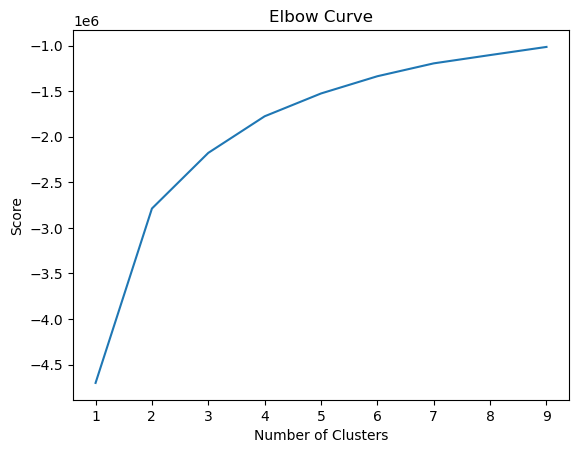

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Task 4 - Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

-    Explain why you chose that number in a markdown cell.
-    If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestion



#### Optimal Number of Clusters

After analyzing the elbow chart, I chose **4** clusters for the k-means algorithm. This decision was based on the observation that at **4** clusters, the WCSS begins to decrease at a slower rate, indicating diminishing returns for additional clusters. This suggests that **4** clusters are sufficient to capture the significant structure of the data without overfitting.

It's important to note that while the elbow method provides a useful heuristic, the decision is somewhat subjective, and the chosen number of clusters also aligns with the practical context of our analysis.


## Task 5 - Run k-means clustering

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [27]:
# Fit the k-means object to the data.

kmeans.fit(numerical_data_df)

KMeans(n_clusters=4)

## Task 6 - Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [29]:
numerical_data_df['clusters'] = kmeans.fit_predict(numerical_data_df)

In [30]:
numerical_data_df.head()

,n_guns_involved,n_killed,n_injured,victim_count,suspect_count,male_victims_count,female_victims_count,male_suspects_count,female_suspects_count,victim_0-17,...,victim_31-45,victim_46-60,victim_61+,suspect_0-17,suspect_18-30,suspect_31-45,suspect_46-60,suspect_61+,n_participants,clusters
0,1.0,0,4,4,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,5,0
1,1.0,1,3,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
2,2.0,1,3,3,2,3,0,2,0,0,...,3,0,0,0,1,1,0,0,5,0
3,1.0,4,0,3,1,3,1,1,0,0,...,1,1,0,0,0,1,0,0,4,0
4,2.0,2,2,3,1,3,1,1,1,1,...,0,1,0,0,0,0,1,0,4,0


In [31]:
numerical_data_df['clusters'].value_counts()

1    201435
0     37702
3       518
2        22
Name: clusters, dtype: int64

## Task 7 - Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

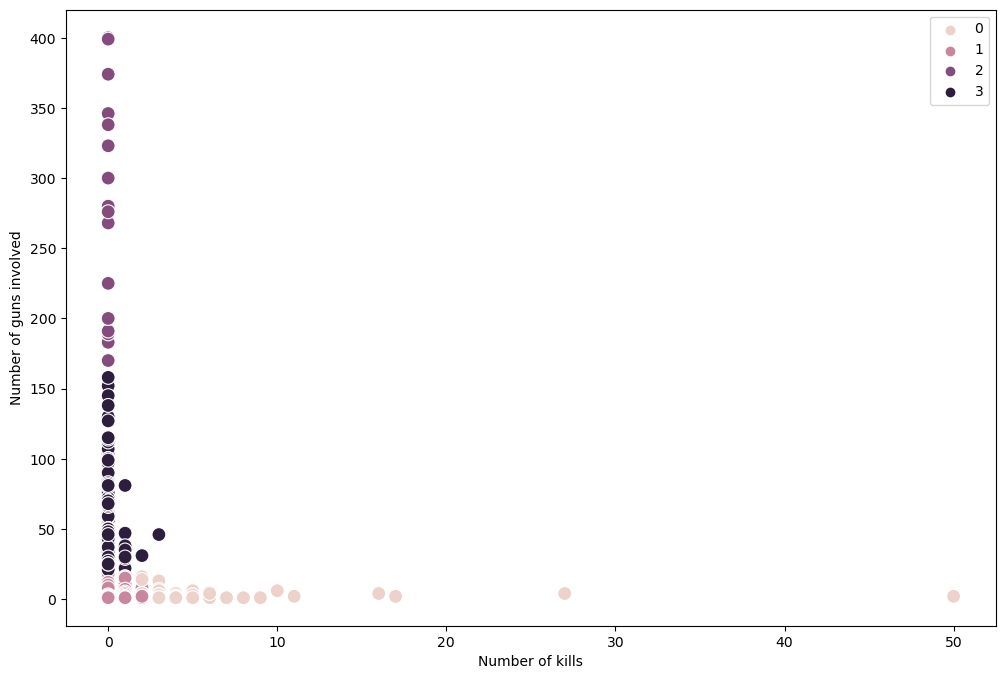

In [46]:
# Plot the clusters for the "Numer of guns involved" and "number of people killed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_data_df['n_killed'], y=numerical_data_df['n_guns_involved'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

# Removing the grid, setting labels
ax.grid(False)
plt.xlabel('Number of kills')
plt.ylabel('Number of guns involved')

# Save the plot before showing it
plt.savefig('number_of_guns_vs_kills.png', dpi=300)

# Display the plot
plt.show()

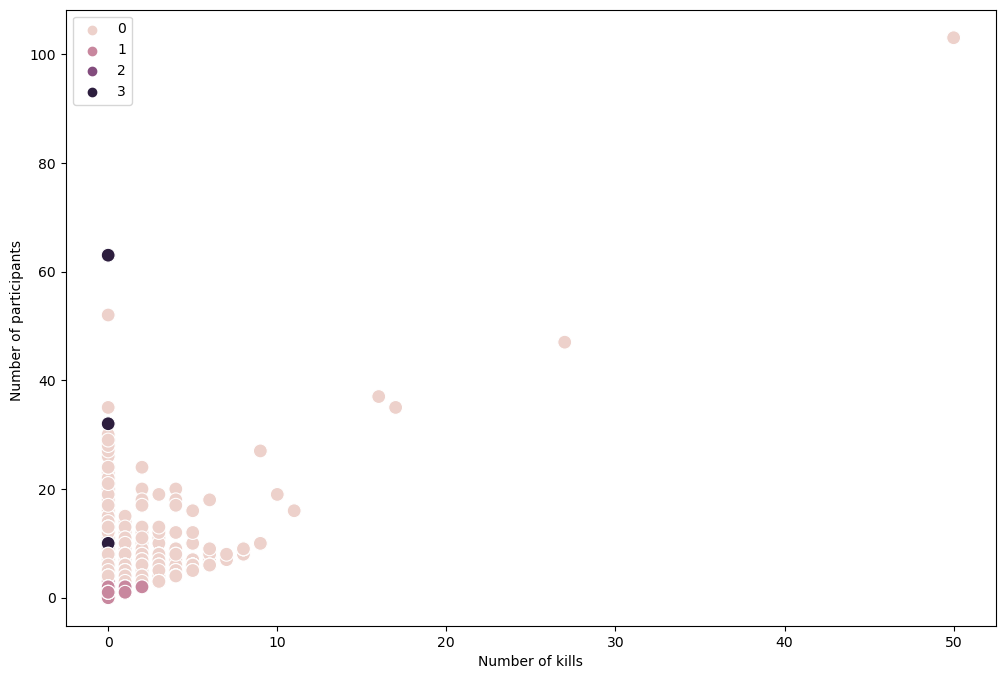

In [47]:
#plot number of kills vs number of participants

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_data_df['n_killed'], y=numerical_data_df['n_participants'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of kills') # Label x-axis.
plt.ylabel('Number of participants ') # Label y-axis.

# Save the plot before showing it
plt.savefig('number_of_kills_vs_number_of_participants.png', dpi=300)

plt.show()

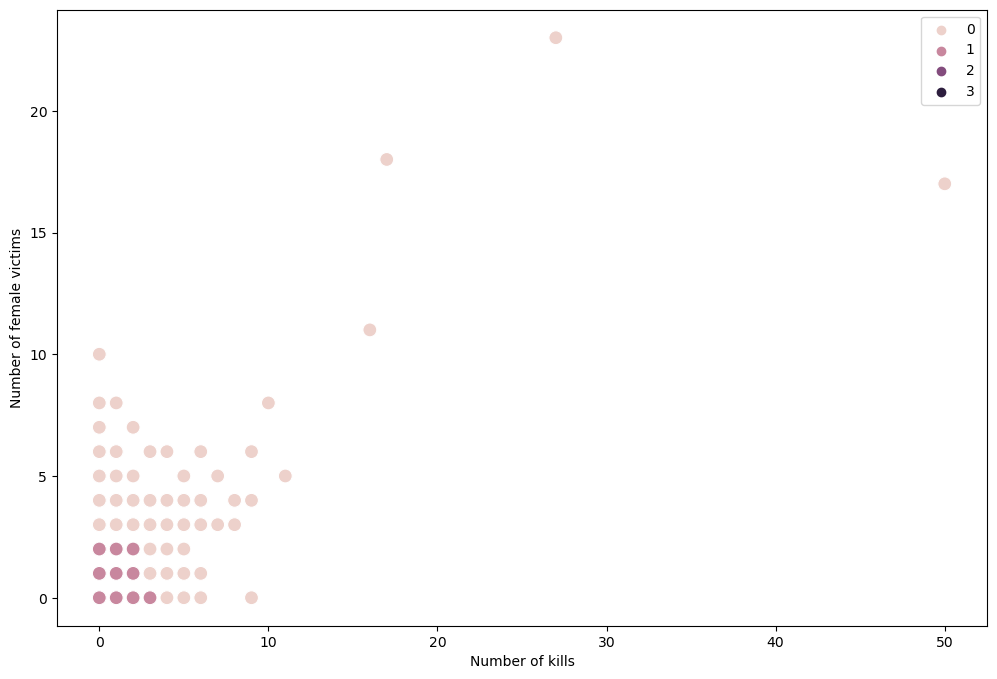

In [48]:
#plot number of kills vs femaile victims

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_data_df['n_killed'], y=numerical_data_df['female_victims_count'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of kills') # Label x-axis.
plt.ylabel('Number of female victims') # Label y-axis.

# Save the plot before showing it
plt.savefig('number_of_kills_vs_number_of_female_victims.png', dpi=300)

plt.show()

## Task 8 - Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

-    Note down your thoughts in a markdown cell.


1. **Number of Guns Involved vs Number of Kills:**
      - The first plot shows a concentration of data points near the origin, indicating that most incidents involve a small number of guns and result in few kills.
      - There are a few outliers with a higher number of guns involved or kills, which could represent more severe incidents.
      - The clusters do not appear to be distinctly separated, suggesting that the relationship between the number of guns involved and the number of kills might not be straightforward or may be influenced by other factors not included in the plot.

2. **Number of Kills vs Number of Female Victims:**
      - The second plot also shows a dense cluster near the origin, which could indicate that incidents often have fewer female victims and fewer kills in general.
      - Similar to the first plot, the lack of clear cluster separation suggests that having more female victims does not necessarily correlate with a higher number of kills, or the data may be too spread out to form distinct clusters.

3. **Number of Kills vs Number of Participants:**
      - The third plot shows some degree of clustering, with incidents involving more participants tending to have a higher number of kills. This might be expected, as incidents with more people involved could lead to more casualties.
      - However, there's also a significant number of incidents with a high number of participants but fewer kills, which could indicate the presence of other variables affecting the outcomes of these incidents.

### Cluster Analysis for Gun-Related Incident Data

### Observations:
- There is a tendency for most incidents to involve fewer guns and result in fewer kills, as seen in the dense clustering near the origin in the plots.
- A higher number of female victims does not appear to correlate with a higher number of kills, suggesting the impact of other unexamined factors.
- Incidents with more participants show a mixed pattern, with both low and high numbers of kills, indicating that the presence of more people at the scene does not consistently lead to more fatalities.

### Insights:
- The lack of distinct clusters in the plots may indicate that the relationships between the examined variables are not straightforward.
- The data might require a more detailed analysis, potentially involving additional variables or employing different clustering algorithms.
- The current clustering might not be capturing the true underlying patterns in the data, and further exploration is warranted to better understand the dynamics of these incidents.

## Task 9 - Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [49]:
#create a column that renames the clusters to colors 
numerical_data_df.loc[numerical_data_df['clusters'] == 3, 'cluster'] = 'black'
numerical_data_df.loc[numerical_data_df['clusters'] == 2, 'cluster'] = 'dark purple'
numerical_data_df.loc[numerical_data_df['clusters'] == 1, 'cluster'] = 'purple'
numerical_data_df.loc[numerical_data_df['clusters'] == 0, 'cluster'] = 'pink'

In [50]:
numerical_data_df.groupby('cluster').agg({
    'n_killed':['mean','median'],
    'female_victims_count':['mean','median'],
    'n_participants':['mean','median'],
    'n_guns_involved':['mean', 'median']
})

n_killed        female_victims_count        n_participants  \
                 mean median                 mean median           mean   
cluster                                                                   
black        0.023166    0.0             0.015444    0.0       2.067568   
dark purple  0.000000    0.0             0.000000    0.0       0.227273   
pink         0.400217    0.0             0.327622    0.0       3.738900   
purple       0.225219    0.0             0.091990    0.0       1.242500   

                   n_guns_involved         
            median            mean median  
cluster                                    
black          1.0       36.277992   29.0  
dark purple    0.0      293.727273  300.0  
pink           3.0        1.193862    1.0  
purple         1.0        1.100295    1.0

### The descriptive statistics for the clusters suggest:

1. **Black Cluster:** Fewer guns involved and a higher number of participants, suggesting incidents with potentially more chaos but less severe weaponry.

2. **Dark Purple Cluster:** Moderate number of guns involved and fewer participants, indicating possibly planned or targeted incidents with no fatalities.

3. **Pink Cluster:** Highest number of guns involved and a high number of participants, which could be indicative of more severe and possibly more chaotic incidents.

The clusters hint at varying incident severities and dynamics, with the Black and Pink clusters showing higher participant involvement, and the Dark Purple cluster showing non-fatal outcomes despite the presence of firearms.

## Task 10 - Propose what these results could be useful for in future steps of an analytics pipeline.

The clustering results can be useful for:

1. **Informing Policy:** Directing policy and law enforcement strategies based on cluster characteristics (e.g., clusters with more guns may need stricter controls).

2. **Allocating Resources:** Prioritizing resource allocation, like emergency response, in areas with clusters indicating higher severity incidents.

3. **Predictive Analysis:** Using clusters as labels for predictive modeling to forecast incident outcomes or classify new incidents.

4. **Public Education:** Tailoring public safety messages to address the specific risks identified within each cluster.

Overall, these insights can help focus efforts where they are most needed and improve the effectiveness of interventions.